In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pls
import seaborn as sns

In [2]:
df = pd.read_csv('../DataSets/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.shape

(5043, 28)

In [4]:
# df.info()
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [6]:
newdf = df.iloc[:, 4:6].dropna()
newdf.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
5,475.0,530.0


In [7]:
newdf.isnull().sum()

director_facebook_likes    0
actor_3_facebook_likes     0
dtype: int64

### K-Means Algorithm

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(newdf)

KMeans(n_clusters=5)

In [9]:
kmeans.cluster_centers_
# gives the final centroids location for respextive clusters

array([[  153.94452806,   424.19264674],
       [17544.11764706,   598.77941176],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [12441.17647059,   604.34313725]])

In [10]:
print(kmeans.labels_) # its the cluster number or name in which particular data point belongs
print(len(kmeans.labels_))

[0 0 0 ... 0 0 0]
4919


In [11]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts = True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4651, 1: 68, 2: 87, 3: 11, 4: 102}


In [12]:
newdf['cluster'] = kmeans.labels_
newdf.head(5)

,director_facebook_likes,actor_3_facebook_likes,cluster
0,0.0,855.0,0
1,563.0,1000.0,0
2,0.0,161.0,0
3,22000.0,23000.0,3
5,475.0,530.0,0


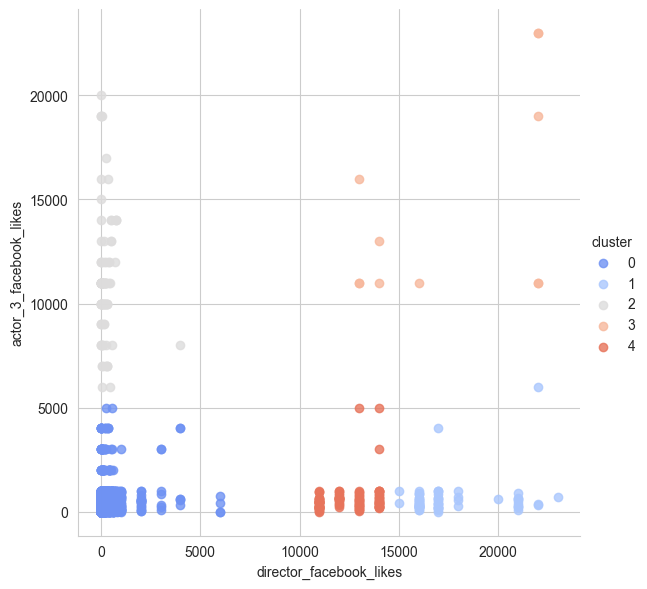

In [13]:
# Plotting Graph

# lm plot is used to create a scatter plot with a linear regression line. It is particularly useful for visualizing the
# relationship between two variables and the linear trend between them

sns.set_style('whitegrid')
sns.lmplot(x='director_facebook_likes', y='actor_3_facebook_likes', data=newdf, hue='cluster',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)